## GOAL: Create a model to predict whether or not a customer will Churn 


## Part 0: Imports and Read in the Data



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### statistical summary of the numeric columns with .describe()

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration



In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

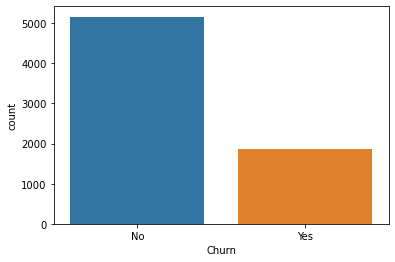

In [7]:
sns.countplot(data=df, x='Churn')

####  Distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

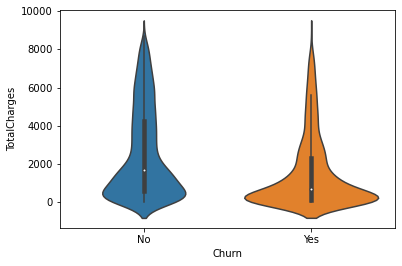

In [8]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

#### a boxplot showing the distribution of TotalCharges per Contract type

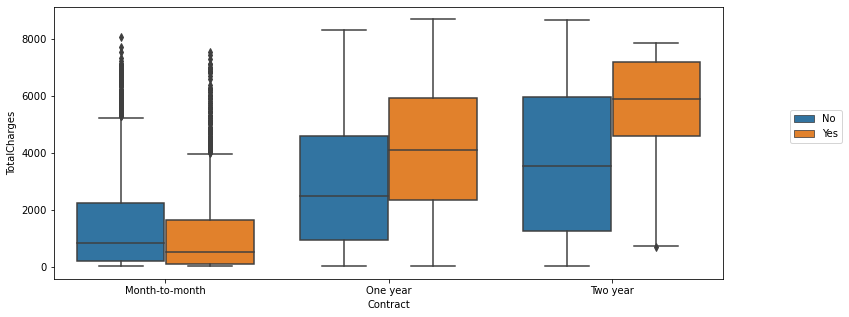

In [9]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x=df['Contract'], y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1,0.5))


In [10]:
corr_df = pd.get_dummies(data=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [11]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

<AxesSubplot:>

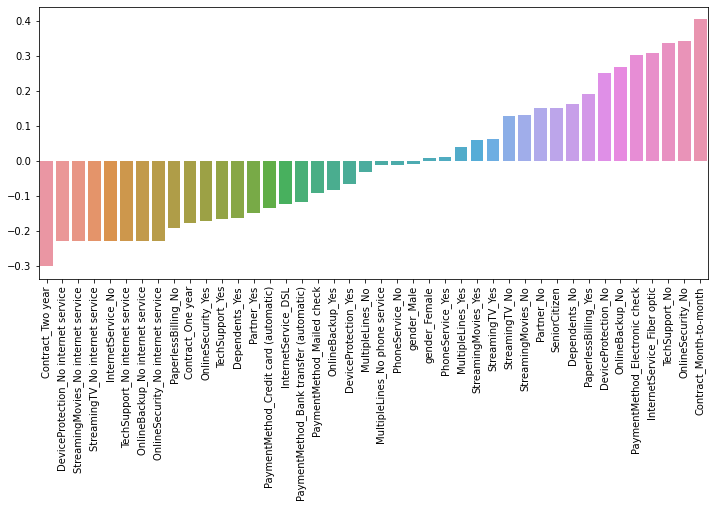

In [12]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)

---
---

# Part 3: Churn Analysis



In [13]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

#### a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer

<AxesSubplot:xlabel='tenure', ylabel='Count'>

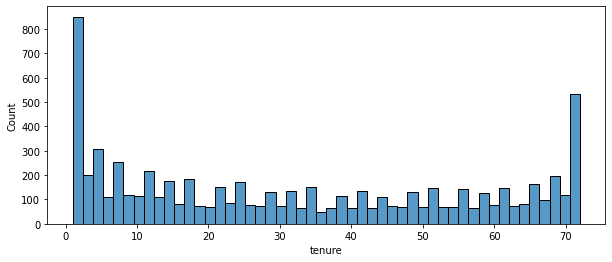

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(df['tenure'], bins=50)



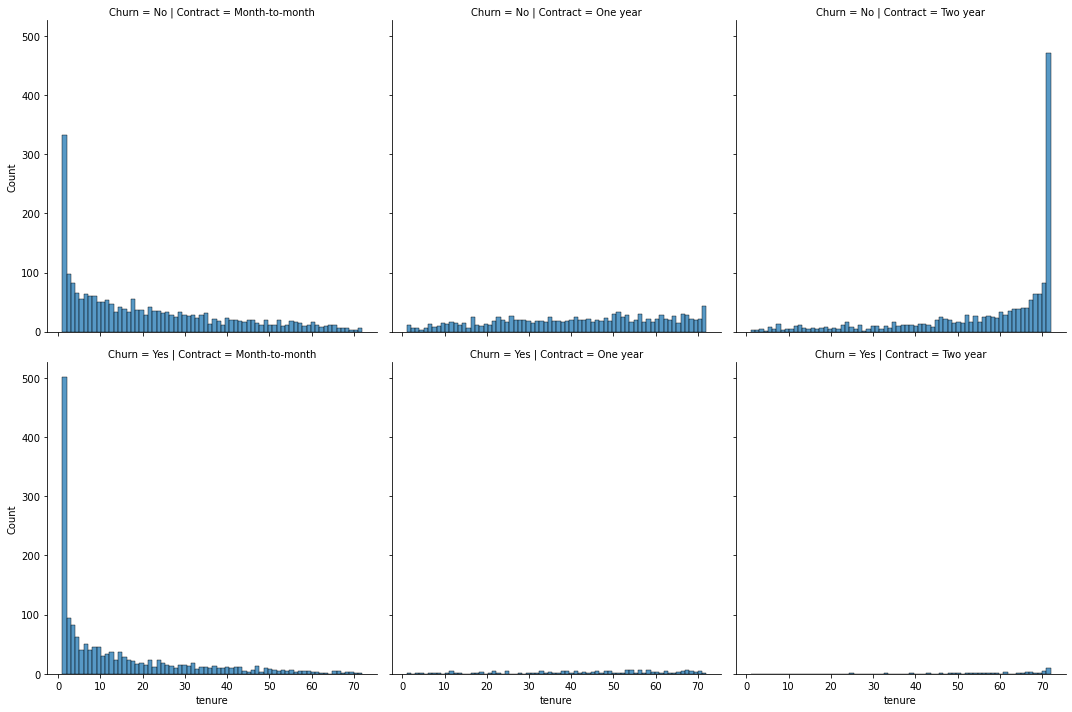

In [15]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

#### a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

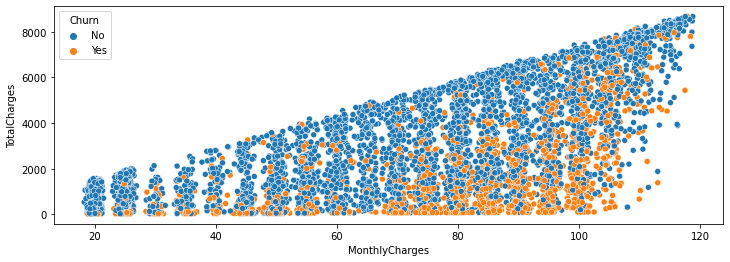

In [16]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn' )

### Creating Cohorts based on Tenure



In [17]:
churn_rates = []

for i in range(1,73):
    total_people_with_1month_tenure = df[df['tenure'] == i]
    total_people_with_1month_tenure_who_churned = total_people_with_1month_tenure[total_people_with_1month_tenure['Churn'] == 'Yes'] 
    churn_rate = 100*(len(total_people_with_1month_tenure_who_churned)/ len(total_people_with_1month_tenure))
    
    churn_rates.append(churn_rate)



In [18]:
series = pd.Series(churn_rates, name='tenure')

In [19]:
series

0     61.990212
1     51.680672
2     47.000000
3     47.159091
4     48.120301
        ...    
67     9.000000
68     8.421053
69     9.243697
70     3.529412
71     1.657459
Name: tenure, Length: 72, dtype: float64

#### a plot showing churn rate per months of tenure.

<AxesSubplot:>

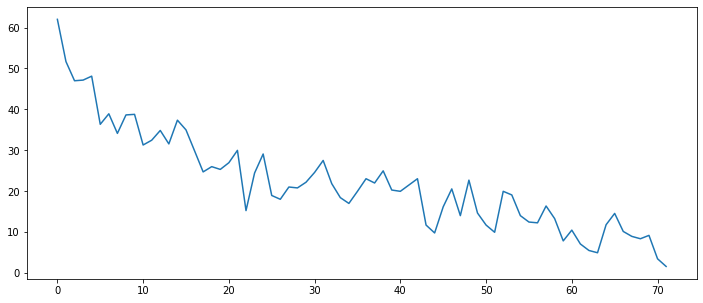

In [20]:
plt.figure(figsize=(12,5))
series.plot()

### Broader Cohort Groups

   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [159]:
def create_cohort(tenure):
    if tenure > 0 and tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [45]:
df['Tenure Cohort'] = df['tenure'].apply(create_cohort)

In [47]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

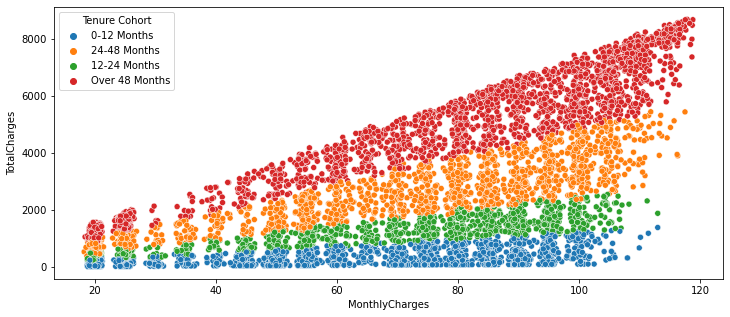

In [51]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

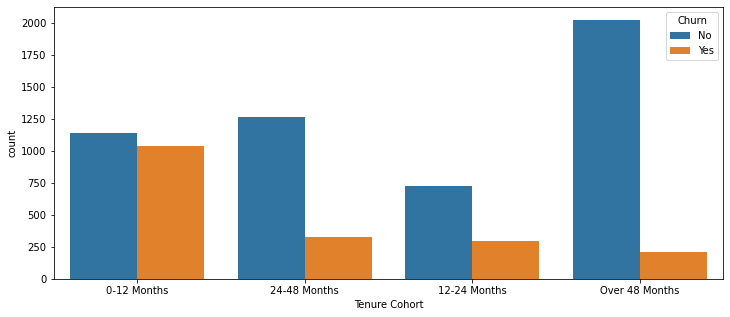

In [55]:
plt.figure(figsize=(12,5))

sns.countplot(x='Tenure Cohort', data=df, hue='Churn')

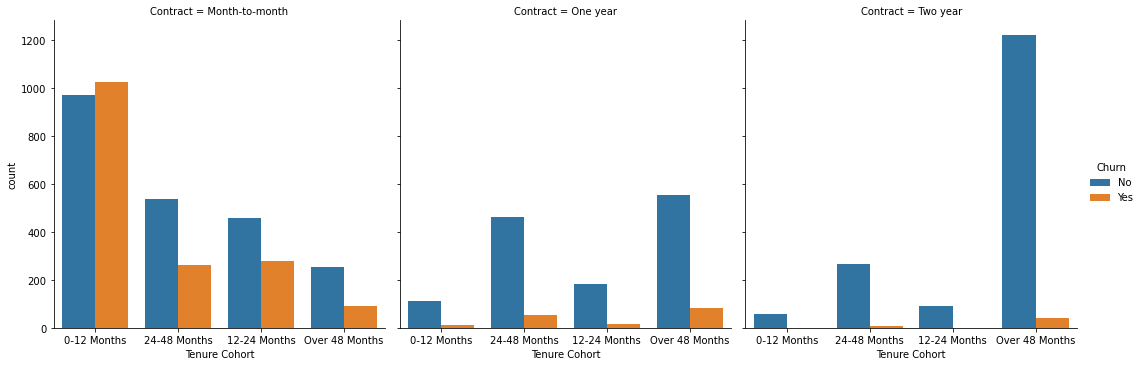

In [70]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract')

-----

# Part 4: Predictive Modeling



## Single Decision Tree

In [12]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
dtc = DecisionTreeClassifier()

In [4]:
from sklearn.model_selection import GridSearchCV

In [16]:
param = {'max_depth': [1,2,3,4,5,6]}

grid = GridSearchCV(estimator=dtc, param_grid=param)

In [17]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6]})

In [18]:
y_preds = grid.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [20]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



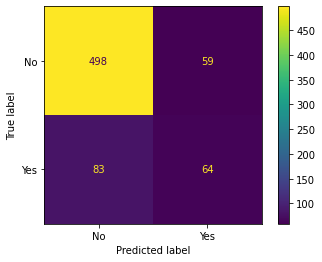

In [21]:
plot_confusion_matrix(grid, X_test, y_test)

In [22]:
f_importances = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                            index=X.columns, columns=['Feature Importances']).sort_values('Feature Importances')


In [23]:
imp_features = f_importances[f_importances['Feature Importances']>0]

<AxesSubplot:ylabel='Feature Importances'>

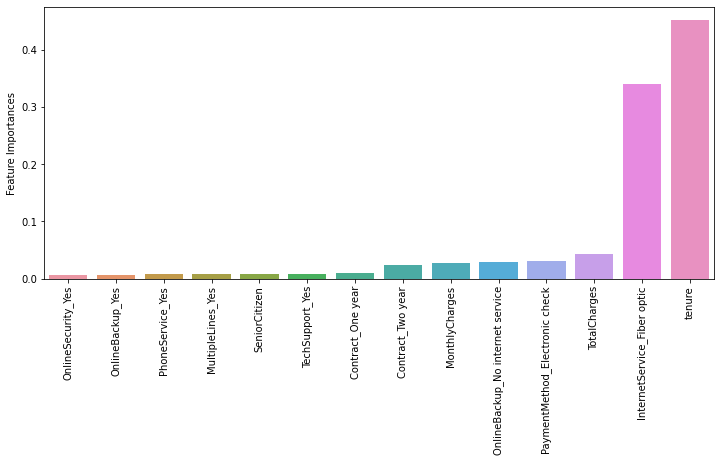

In [24]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(data=imp_features, x=imp_features.index, y='Feature Importances')

In [25]:
from sklearn.tree import plot_tree

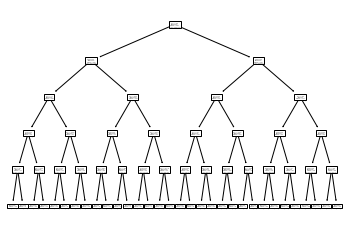

In [26]:
plot_tree(grid.best_estimator_);

## Random Forest



In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier()

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
rfc_param = {'n_estimators': [50,64,100,200],
         'max_depth': [2,3,4,6,8],
         'min_samples_split': [2,3,4]}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_param)

In [31]:
rfc_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 6, 8],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 64, 100, 200]})

In [32]:
rfc_preds = rfc_grid.predict(X_test)

In [33]:
print(classification_report(y_test, rfc_preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.90       557
         Yes       0.62      0.48      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



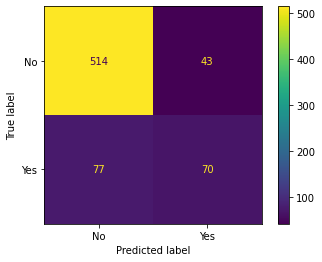

In [34]:
plot_confusion_matrix(rfc_grid, X_test, y_test)

## Boosted Trees



In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ada_model = AdaBoostClassifier()

In [37]:
ada_param = {'n_estimators': [10,50,100,200]}

ada_grid = GridSearchCV(estimator=ada_model, param_grid=ada_param)

In [38]:
ada_grid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})

In [39]:
ada_preds = ada_grid.predict(X_test)

In [40]:
ada_grid.best_params_

{'n_estimators': 50}

In [41]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



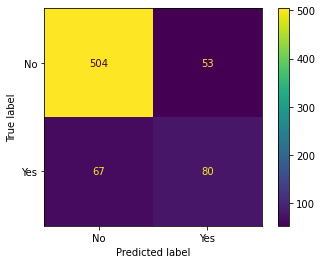

In [42]:
plot_confusion_matrix(ada_grid, X_test, y_test)

#### Best Accuracy : 83%  
#### Best Recall score: 92%